<a href="https://colab.research.google.com/github/LuvMutreja/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Unsupervised_ML_Project_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual - Luv Mutreja


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[GitHub Repository Link](https://)

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from datetime import date
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
plt.rcParams['figure.figsize'] = (10,6)

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mounting the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Alma Better/Module 4 Machine Learning/#Capstone Projects/Unsupervised Capstone Project- NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset's Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [ ]:
# printing the total null values in the dataset
print('Total null values present in this dataset are :',dataset.isnull().sum().sum())

Total null values present in this dataset are : 3631


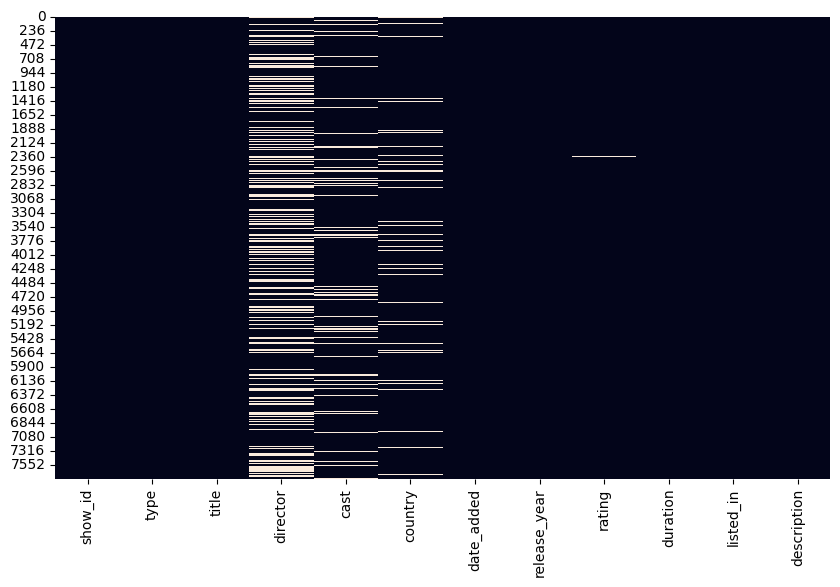

In [ ]:
# visualizing Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)
plt.show()

### What did you learn about your dataset?

## ***2. Understanding Your Variables***

In [ ]:
# Dataset's Columns
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Describing the Dataset 
dataset.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genre

description: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Number of Unique Values in each variable.
for col in dataset.columns:
  print('Number of unique values in ',col,' is ',dataset[col].nunique())

Number of unique values in  show_id  is  7787
Number of unique values in  type  is  2
Number of unique values in  title  is  7787
Number of unique values in  director  is  4049
Number of unique values in  cast  is  6831
Number of unique values in  country  is  681
Number of unique values in  date_added  is  1565
Number of unique values in  release_year  is  73
Number of unique values in  rating  is  14
Number of unique values in  duration  is  216
Number of unique values in  listed_in  is  492
Number of unique values in  description  is  7769


## 3. ***Handling Missing Values and Data Wrangling***

In [ ]:
# viewing the % of null values in columns having null values
for col in dataset.columns[dataset.isnull().any()].tolist():
    print(col,'has',(dataset[col].isnull().sum()/dataset.shape[0])*100,'% null values' )

director has 30.679337357133683 % null values
cast has 9.220495697958135 % null values
country has 6.51085141903172 % null values
date_added has 0.1284191601386927 % null values
rating has 0.08989341209708489 % null values


In [ ]:
# filling the null values of director, cast, country and rating columns  
for col in dataset.columns[dataset.isnull().any()].tolist():
    if col not in 'date_added':
        dataset[col].fillna('unknown',inplace=True)

**Null values for Date_added column will be handled ahead.**

In [ ]:
# viewing the cast column
dataset['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                              unknown
Name: cast, Length: 7787, dtype: object

In [ ]:
# making a function to extract the number of movies and tv shows an actor has appeared in
def making_df_from_column(col,column_names):
    lis=[]
    for row in range(dataset.shape[0]):
        if ',' in dataset[col][row]: 
            for item in dataset[col][row].split(','):
                lis.append(item)
        else:
            lis.append(dataset[col][row])        
    dictionary={}
    for item in set(lis):
        dictionary.update({item : lis.count(item)})
    df=pd.DataFrame(dictionary.items(),columns=column_names)
    return df 

In [ ]:
# applying the above made function on the cast column
actors_df=making_df_from_column('cast',['actors','appeared_in'])
# viewing the result
actors_df

,actors,appeared_in
0,Matthew Espinosa,1
1,Ida Ursin-Holm,1
2,Ian James Corlett,14
3,Joan Didion,1
4,Marlann Flores,1
...,...,...
35368,Thomas Doret,2
35369,Defne Halman,1
35370,Abeer Ahmad,1
35371,Mehul Buch,1


In [ ]:
# checking the null values for each column
dataset.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [ ]:
# dropping the 10 rows with null date_added 
dataset.dropna(inplace=True)

In [ ]:
# viewing the sum of null values in the dataset
dataset.isnull().sum().sum()

0

In [ ]:
# making a new dataset from the orignal dataset which will contain data for movies only
movies=dataset[dataset['type']=='Movie']

In [ ]:
# converting the datatype of duration for movies to int 
movies['duration']=movies['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
# viewing the country and genre column
dataset[['country','listed_in']]

,country,listed_in
0,Brazil,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Mexico,"Dramas, International Movies"
2,Singapore,"Horror Movies, International Movies"
3,United States,"Action & Adventure, Independent Movies, Sci-Fi..."
4,United States,Dramas
...,...,...
7782,"Sweden, Czech Republic, United Kingdom, Denmar...","Dramas, International Movies"
7783,India,"Dramas, International Movies, Music & Musicals"
7784,unknown,"Documentaries, International Movies, Music & M..."
7785,Australia,"International TV Shows, Reality TV"


In [ ]:
# the values for country and genre column are not ideal
# so taking the first values from both the columns
for col in ['country','listed_in']:
  dataset[col]=dataset[col].apply(lambda x : x.split(',')[0])

In [ ]:
# now as we can see the country and genre column will contain only the first values
dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,TV-MA,99 min,Dramas,When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,unknown,Nasty C,unknown,"September 25, 2020",2019,TV-MA,44 min,Documentaries,"In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,International TV Shows,Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
# Creating a function to convert date_added value's datatype from string to a string that can be converted to datetime datatype
def date_to_str(s):
  s=s.split()
  if s[1][0]==' ':
    s1='0'+s[1][1]+'.'
  else:
    s1=s[1][:-1]+'.'  
  if 'Jan'in s[0][:3]:
    s1=s1+'01'
  elif 'Feb'in s[0][:3]:
    s1=s1+'02'
  elif 'Mar'in s[0][:3]:
    s1=s1+'03'
  elif 'Apr'in s[0][:3]:
    s1=s1+'04'
  elif 'May'in s[0][:3]:
    s1=s1+'05'
  elif 'Jun'in s[0][:3]:
    s1=s1+'06'
  elif 'Jul'in s[0][:3]:
    s1=s1+'07'
  elif 'Aug'in s[0][:3]:
    s1=s1+'08'
  elif 'Sep'in s[0][:3]:
    s1=s1+'09'
  elif 'Oct'in s[0][:3]:
    s1=s1+'10'
  elif 'Nov'in s[0][:3]:
    s1=s1+'11'
  elif 'Dec'in s[0][:3]:
    s1=s1+'12'    
  s1=s1+'.'
  s1=s1+s[2][-2:]
  return s1                   

In [ ]:
# applying the above created function to the date_added column
dataset['date_added']=dataset.apply(lambda x:date_to_str(x['date_added']),axis=1)

In [ ]:
# converting the date_added column's datatype to datetime datatype
dataset['date_added']=dataset['date_added'].apply(lambda x:datetime.strptime(x,'%d.%m.%y'))

In [ ]:
# viewing the dataset
dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,2020-10-19,2005,TV-MA,99 min,Dramas,When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,unknown,Nasty C,unknown,2020-09-25,2019,TV-MA,44 min,Documentaries,"In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,International TV Shows,Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
# extracting the year from date_added column
dataset['year_added']=dataset['date_added'].apply(lambda x : x.year)

In [ ]:
# viewing the dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
 12  year_added    7777 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 850.6+ KB


In [ ]:
# making a new column which will tell if a show was added in the same year it was released or not
dataset['latest']=np.where(dataset['year_added']==dataset['release_year'],1,0)

In [ ]:
# creating a dictionary for the values of the rating column
rating_dict={'rating':{'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}}
# replacing the rating column's values 
dataset=dataset.replace(rating_dict)

In [ ]:
# viewing the 1st 5 rows
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,latest
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,Adults,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...,2020,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,Adults,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,Adults,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,Teens,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...,2020,0


In [ ]:
# defining a function to create a bag of words given dataset and column as argument
def wordcloud(dataset,column):
  words=''
  stopwords= set(STOPWORDS)
  for value in dataset[column].values:
    value=str(value)
    tokens=value.split()
    for i in range(len(tokens)):
      tokens[i]=tokens[i].lower()
    words= words + ' '.join(tokens)+' '  
  wordcloud= WordCloud(width=700,height=700,background_color='white',stopwords=stopwords,min_font_size=10).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  return plt.show()

#### What all missing value imputation techniques have you used and why did you use those techniques?

There were 5 columns haveing null values
* Director column had 31% of the values as null so I replaced those values with unknown.
* Cast column had 9% of the values as null so I replaced those values with unknown.
* Country had 6.5% of the values as null so I replaced those values with unknown.
* Rating had 0.09% of the values as null so I replaced those values with unknown.
* Date_added had 0.13% of the values as null so I dropped those values.

### What all manipulations have you done and insights you found?

The manipulations done insights found are:
* Created a function to extract the number of movies and tv shows an actor has appeared in.
* Created a new dataframe from the orignal dataframe which only contained the details for movies.
* Converted the duration for movies to int.
* The values for country and genre column are not ideal so only considering the first values from both the columns.
* Created a function to convert date_added column value's datatype from string to datetime datatype.
* Extracted the year from date_added column and assigned the values to a new column named year_added.
* Made a new column named latest which showed if a show was added in the same year it was released or not.
* Replaced the values of the rating column.
* Created a function to create wordcloud given dataset and column as argument.

## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1. Show Type value counts (univariate)

In [ ]:
# visualization code
px.pie(names=np.sort(dataset['type'].unique()),values=dataset['type'].value_counts(),template='plotly_dark',hole=0.8,width=450,height=400,color_discrete_sequence=['#FFFF00', '#Ff0000']).update_traces(hovertemplate=None,textinfo='percent + value + label',showlegend=False).update_layout(title_text='Number of TV Shows and Movies',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view the number of Movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Movies are more in number i.e 69% i.e 5377.
* TV Shows are less in number i.e 31% i.e 2400.

#### Chart - 2. Number of shows released in each year (univariate)

In [ ]:
# visualization code
px.histogram(dataset,x='release_year',color_discrete_sequence=['#Ff0000'],template='plotly_dark').update_layout(title_text='Shows released year wise',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view in which year were maximum shows released 

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Maximum shows released in the year 2018 i.e 1120. 

#### Chart - 3. Actors who appeared in most shows (univariate)

In [ ]:
# visualization code
px.bar(actors_df.sort_values(by='appeared_in',ascending=False)[1:20],x='actors',y='appeared_in',template='plotly_dark',color_discrete_sequence=['#800020']).update_layout(title_text='Top 20 Actors who appeared in most shows',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view Actors who appeared in most shows

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Anupam Kher appeared in most of the shows i.e 38.
* Followed by Takahiro Sakurai i.e 28.
*  Followed by Shah Rukh Khan i.e 27.

#### Chart - 4. Countries producing the maximum content (univariate)

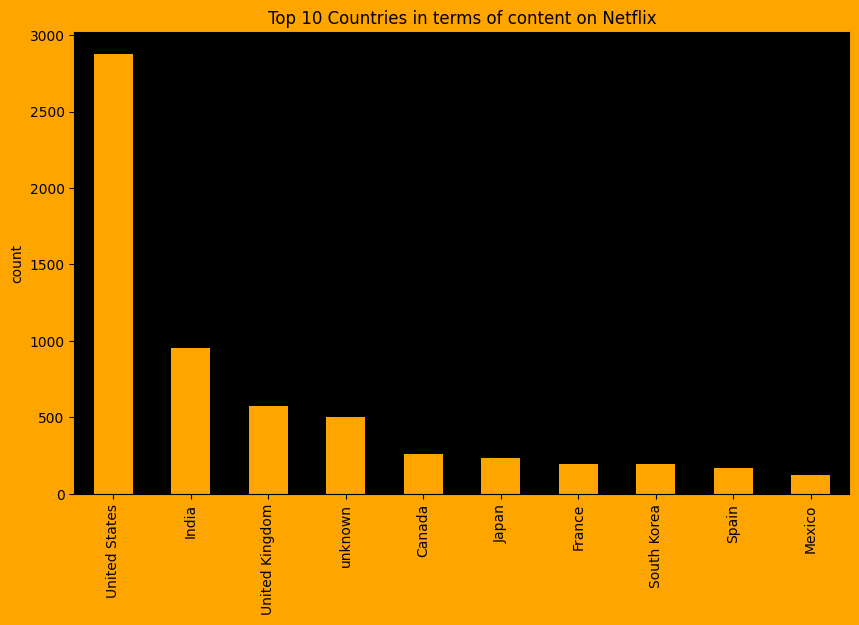

In [ ]:
# Chart - 7 visualization code
plt.figure(facecolor='#FFA500')
plt.axes().set_facecolor("black")
dataset['country'].value_counts()[:10].plot(kind='bar',color='#FFA500')
plt.title('Top 10 Countries in terms of content on Netflix')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

To view the Countries producing the maximum content

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* United States is producing the maximum content.
* Followed by India.
* Followed by United Kingdom.

#### Chart - 5. Top 10 Directors (univariate)

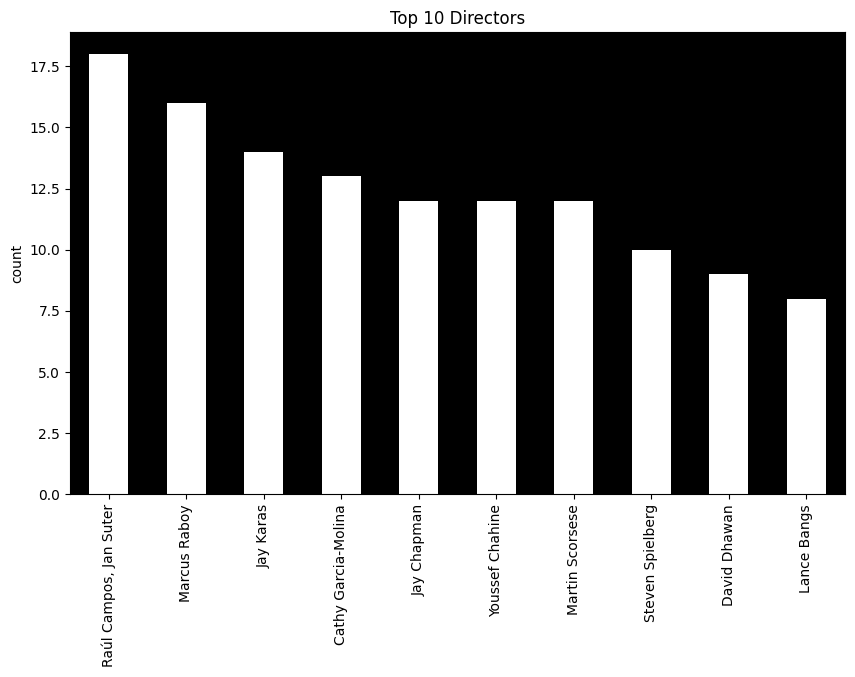

In [ ]:
# visualization code
plt.figure(facecolor='white')
plt.axes().set_facecolor("black")
dataset['director'].value_counts()[1:11].plot(kind='bar',color='white')
plt.title('Top 10 Directors')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

To view the top directors in terms of content on netflix

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Raul and Jan have directed the maximum content.
* Followed by Marcus.
* Followed by Jay Karas.

#### Chart - 6. Which Genre has the highest number of shows (univariate)

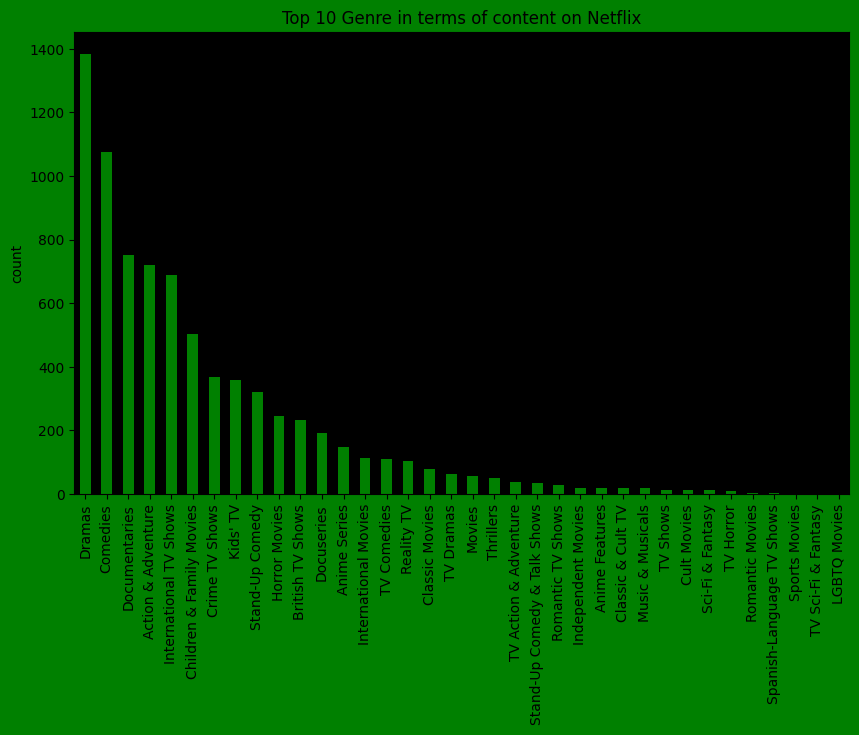

In [ ]:
# Chart - 9 visualization code
plt.figure(facecolor='green')
plt.axes().set_facecolor("black")
dataset['listed_in'].value_counts().plot(kind='bar',color='green')
plt.title('Top 10 Genre in terms of content on Netflix')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

To view the genre having the maximum content

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Maximum content belongs to drama genre.
* Followed by comedy genre.
* Followed by documentaries.

#### Chart - 7. Movies duration (univariate)

In [ ]:
# visualization code
px.histogram(movies,x='duration',template='plotly_dark',color_discrete_sequence=['#00FF00']).update_traces(showlegend=False).update_layout(title_text='Number of Movies for each Movie duration',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view Number of Movies for each Movie duration

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Maximum i.e 261 movies fall in the 90-91 min duration. 
* 249 movies fall in the 92-93 min duration.
* 244 movies fall in the 94-95 min duration

#### Chart - 8. TV Shows Duration (univariate)

In [ ]:
# visualization code
px.histogram(dataset[dataset['type']=='TV Show'],x='duration',color='type',template='plotly_dark',color_discrete_sequence=['#008080']).update_traces(showlegend=False).update_layout(title_text='Number of TV Shows for each TV Show duration',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view Number of tv shows for each tv shows duration

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Maximum i.e 1608 tv shows have 1 season.
* 378 tv shows have 2 seasons.
* 183 tv shows have 3 seasons.

#### Chart - 9. ICICLE chart for Country (univariate)

In [ ]:
# visualization code
px.icicle(dataset,path=[px.Constant('world'),'country'],template='plotly_dark')

##### 1. Why did you pick the specific chart?

To view the descending order of country in terms of content on netflix

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Zimbabwe, Mauritius are at the last with 1 show each.
* India is 2nd with 956 shows.
* United States is 1st with 2877 shows.

#### Chart - 10. Word CLoud for Description column (univariate) 

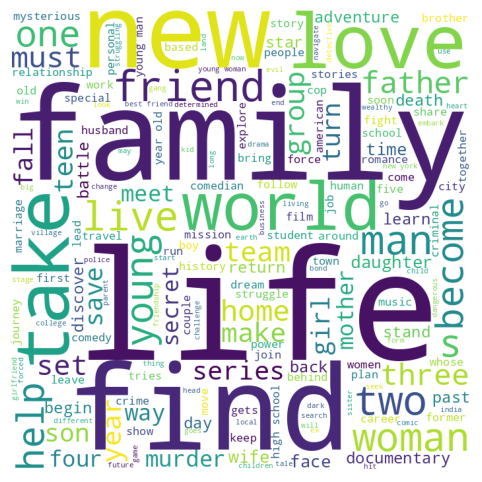

In [ ]:
# visualization code
wordcloud(dataset,'description')

##### 1. Why did you pick the specific chart?

To view the wordcloud for description column

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* The main words from the description column are:
 
 - New, love, life family, find, world, take etc.

#### Chart - 11. Latest Shows (univariate)

In [ ]:
# visualization code
px.pie(names=dataset['latest'].unique(),values=np.sort(dataset['latest'].value_counts()),hole=0.5,template='plotly_dark',width=650,height=350,color_discrete_sequence=['#7A2048','#1E2761']).update_traces(hovertemplate=None,textinfo='percent + value + label',showlegend=False).update_layout(title_text='Release year and Added year same for shows (1 means Yes 0 means No)',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view the number of latest shows.

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* 2825 shows were added in the same year in which they released.
* 4952 shows were  not added in the same year in which they released.

#### Chart - 12. Number of tv shows and movies released in each year (bivariate)

In [ ]:
# visualization code
px.histogram(dataset,x='release_year',color='type',color_discrete_sequence=['#Ff0000','#0000ff'],barmode='group',template='plotly_dark').update_layout(title_text='TV shows and Movies released year wise',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view the Number of tv shows and movies released in each year

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* In 2017 the highest number of movies were released i.e 744.
* In 2020 the highest number of tv shows were released i.e 457.
* On only 2 occasions the number of tv shows were more than movie releases i.e in the years 2020 and 2021, that may be because of covid.  

#### Chart - 13. When were most of the Shows added on NETFLIX (bivariate)

In [ ]:
# visualization code
px.histogram(dataset,x='year_added',color='type',barmode='group',template='plotly_dark',color_discrete_sequence=['#FFFF00','#013220']).update_layout(title_text='In which year were most shows added',title_x=0.5)

##### 1. Why did you pick the specific chart?

TO view when were most of the Shows added on NETFLIX

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Highest movies were added in the year 2019 i.e 1497.
* Highest tv shows were added in the year 2020 i.e 697.

#### Chart - 14. For which Age group does Netflix has the most content (bivariate)

In [ ]:
# visualization code
px.histogram(dataset,x='rating',color='type',barmode='group',template='plotly_dark',color_discrete_sequence=['#FF69B4','#7F00FF']).update_layout(title_text='Number of shows for different age groups',title_x=0.5)

##### 1. Why did you pick the specific chart?

To view the Number of Movies and Tv Shows for different show Ratings

##### 2. What is/are the insight(s) found from the chart?

The insights found from this chart are-
* Movies and tv shows are in descending order for adults > teens > older kids > kids.

## ***6. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1. All countries are contributing eqally in terms of content on NETFLIX

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2. NETFLIX has equal number of shows for each age group.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***7. Feature Engineering & Data Pre-processing***

### 1. Feature Manipulation & Selection

In [ ]:
# viewing the 1st 5 rows
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,latest
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,Adults,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...,2020,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,Adults,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,Adults,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,Teens,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...,2020,0


In [ ]:
# choosing the columns that will be used for clustering and making a new detaframe with those columns
clustering_df=dataset[['title','director','cast','country','listed_in','description']]

In [ ]:
# setting the title as the index of the new dataframe
clustering_df.set_index('title',inplace=True)

In [ ]:
# viewing 1st 5 rows of the new dataframe
clustering_df.head()

,director,cast,country,listed_in,description
title,,,,,
3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,International TV Shows,In a future where the elite inhabit an island ...
7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,Dramas,After a devastating earthquake hits Mexico Cit...
23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,Horror Movies,"When an army recruit is found dead, his fellow..."
9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi..."
21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,Dramas,A brilliant group of students become card-coun...


In [ ]:
# making a single column by combining all the necessary columns 
clustering_df['clustering_column']=clustering_df['director']+' '+clustering_df['cast']+' '+clustering_df['country']+' '+clustering_df['listed_in']+' '+clustering_df['description']

In [ ]:
# only keeping the column which has all the content and dropping the remaining columns
clustering_df.drop([col for col in clustering_df.columns if col not in 'clustering_column'],axis=1,inplace=True)

In [ ]:
# viewing the dataframe
clustering_df

,clustering_column
title,
3%,"unknown João Miguel, Bianca Comparato, Michel ..."
7:19,"Jorge Michel Grau Demián Bichir, Héctor Bonill..."
23:59,"Gilbert Chan Tedd Chan, Stella Chung, Henley H..."
9,"Shane Acker Elijah Wood, John C. Reilly, Jenni..."
21,"Robert Luketic Jim Sturgess, Kevin Spacey, Kat..."
...,...
Zozo,"Josef Fares Imad Creidi, Antoinette Turk, Elia..."
Zubaan,"Mozez Singh Vicky Kaushal, Sarah-Jane Dias, Ra..."
Zulu Man in Japan,unknown Nasty C unknown Documentaries In this ...


In [ ]:
# viewing the 1st row of the clustering column
clustering_df['clustering_column'][0]

'unknown João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil International TV Shows In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

##### Which all features you found important and why?

Answer Here.

### 2. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Lower Casing

In [ ]:
# converting the clustering column's values to lower case
clustering_df['clustering_column']=clustering_df['clustering_column'].str.lower()

In [ ]:
# viewing the 1st row of the clustering column
clustering_df['clustering_column'][0]

'unknown joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil international tv shows in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 2. Expand Contraction

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.8 MB/s eta 0:00:00


In [ ]:
# importing contractions
import contractions
# defining a function to expand the words and remove the expansions
def expansion_function(string):
  expanded=[]
  for word in string.split():
    expanded.append(contractions.fix(word))
  expanded=' '.join(expanded)
  return expanded

In [ ]:
# applying the expansion fuction
clustering_df['clustering_column']=clustering_df['clustering_column'].apply(expansion_function)

In [ ]:
# viewing the 1st row of the clustering column
clustering_df['clustering_column'][0]

'unknown joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil international tv shows in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 3. Removing Punctuations

In [ ]:
# defining a function to remove punctuations
def remove_punctuations(string):
  final=''
  for char in string:
    if char not in [',','.',"'",'"','?','!',';','%','(',')','&','-','1','2','3','4','5','6','7','8','9','0','_']:
      final+=char
  return final    

In [ ]:
# applying the above function
clustering_df['clustering_column']=clustering_df['clustering_column'].apply(remove_punctuations)

In [ ]:
# viewing the 1st row of the clustering column
clustering_df['clustering_column'][0]

'unknown joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil international tv shows in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor'

#### 5. Removing Stopwords

In [ ]:
# defining a function to remove the stopwords
def remove_stopwords(string):
  final=[]
  stopwords=set(STOPWORDS)
  for word in string.split():
    if word not in stopwords:
      final.append(word)
  final= ' '.join(final)
  return final    

In [ ]:
# applying the above function
clustering_df['clustering_column']=clustering_df['clustering_column'].apply(remove_stopwords)

In [ ]:
# viewing the 1st row of the clustering column
clustering_df['clustering_column'][0]

'unknown joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil international tv shows future elite inhabit island paradise far crowded slums one chance join saved squalor'

#### 8. Lemmatization

In [ ]:
# importing the libraries important for lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# defining a function to lemmatize the words
def lemmatization(string):
  lemmatizer=WordNetLemmatizer()
  lemmatized=[lemmatizer.lemmatize(word) for word in string.split()]
  lemmatized= ' '.join(lemmatized)
  return lemmatized

In [ ]:
# applying the above fuction
clustering_df['clustering_column']=clustering_df['clustering_column'].apply(lemmatization)

In [ ]:
# viewing the 1st row of the clustering column
print(clustering_df['clustering_column'][0])

unknown joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil international tv show future elite inhabit island paradise far crowded slum one chance join saved squalor


In [ ]:
# creating a same dataframe which will be used further
clustering_df1=clustering_df

##### Which text normalization technique have you used and why?

Answer Here.

#### 10. Text Vectorization

In [ ]:
# importing the libraries important for vectorizing text
from sklearn.feature_extraction.text import TfidfVectorizer

In [151]:
# Initialize a TfidfVectorizer object
tfidf = TfidfVectorizer(max_df=0.9,min_df=3,max_features=1000)
# Fitting the vectorizer to the corpus and transform it into a TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(clustering_df['clustering_column'])
# viewing the shape of the tfidf matrix
tfidf_matrix.shape

(7777, 1000)

In [152]:
# converting the tfidf matrix to a dataframe
tfidf_df=pd.DataFrame(tfidf_matrix.toarray())
# and viewing it
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.182373,0.0,0.0,0.0,0.0,0.174508,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.235333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7775,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Which text vectorization technique have you used and why?

I have used TFIDF vectorizer because 

### 3. Data Scaling

In [153]:
# scaling the data using standard scaler
stdsc=StandardScaler()
x=stdsc.fit_transform(tfidf_df)

##### Which method have you used to scale you data and why?

I have used standard scaler to scale the data because standard scaler is robust to outliers and standard scaler does not limit the data within a specified range, so the data does leave its pattern and trends.Lastly, whenever PCA has to be applied then data is first scaled using standard scaler most of the time.

### 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, Diamensionality reduction is needed here beacause the number of columns we have are 14871. We can not work with these many rows and inorder to apply any machine learning algorithm on the data we must reduce its dimensions i.e features i.e columns.  

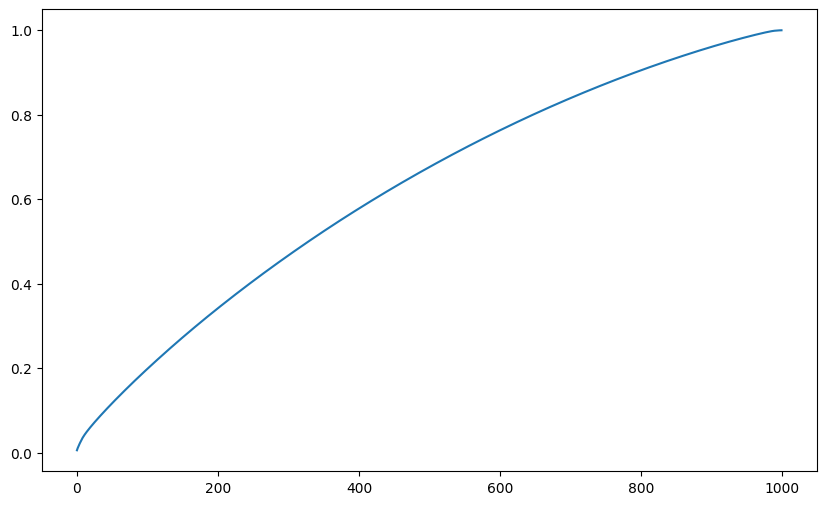

In [154]:
# initializing the pca object
pca=PCA()
# fitting the pca object
pca.fit(x)
# plotting the explained variance ratio's cummulative sum
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [155]:
# using pca with  n_components 
pca=PCA(n_components=2,random_state=2510)
pca.fit(x)

PCA(n_components=2, random_state=2510)

In [156]:
# transforming the data by applying pca on it
x_pca=pca.transform(x)

In [157]:
# viewing the shape
x_pca.shape

(7777, 2)

In [158]:
# viewing the cummulative sum of variance explained by the chosen number of pcs
np.cumsum(pca.explained_variance_ratio_)

array([0.00585671, 0.01075046])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used Principle Component Analysis on the data to reduce the dimensions of the dataset so that clustering algorithms can be applied on the data.

## ***8. ML Model Implementation***

### ML Model - 1. KMeans

#### Deciding the optimal value of K in KMeans

In [159]:
# creating the dataframe whose columns will be k : the number of clusters and each cluster's variance and silhouette score
cluster_range=range(1,25)
variance=[]
sil_scores=[]
for k in cluster_range:
  kmeans=KMeans(k,random_state=2510)
  kmeans.fit(x_pca)
  variance.append(kmeans.inertia_)
  if k==1:
    sil_scores.append(0)
  else:  
    sil_scores.append(silhouette_score(x_pca,kmeans.labels_))

kmeans_df=pd.DataFrame({'k':cluster_range,'variance':variance,'silhouette_score':sil_scores})  

In [160]:
# viewing the created dataframe
kmeans_df

,k,variance,silhouette_score
0,1,83606.605796,0.000000
1,2,51310.523917,0.402157
2,3,27948.112388,0.473272
3,4,19243.507634,0.432223
4,5,15355.093404,0.448951
5,6,11828.095081,0.409477
6,7,9950.870169,0.398554
7,8,8355.968653,0.391269
8,9,7486.478045,0.376854
9,10,6670.742128,0.372038


**Using the elbow method**

In [161]:
# plotting the variance for each value of k in kmeans
px.line(kmeans_df,x='k',y='variance')

**And the Silhouette score method**

In [162]:
# plotting the silhoutte score for each value of k in kmeans
px.line(kmeans_df.iloc[1:],x='k',y='silhouette_score')

#### Choosing K as 7

In [236]:
# 
kmeans=KMeans(n_clusters=23,random_state=2510)
kmeans.fit(x_pca)

KMeans(n_clusters=23, random_state=2510)

In [237]:
# printing the variance and silhoutte score for the selected value of k
print(kmeans.inertia_,silhouette_score(x_pca,kmeans.labels_))

2916.33816489731 0.3392665016600605


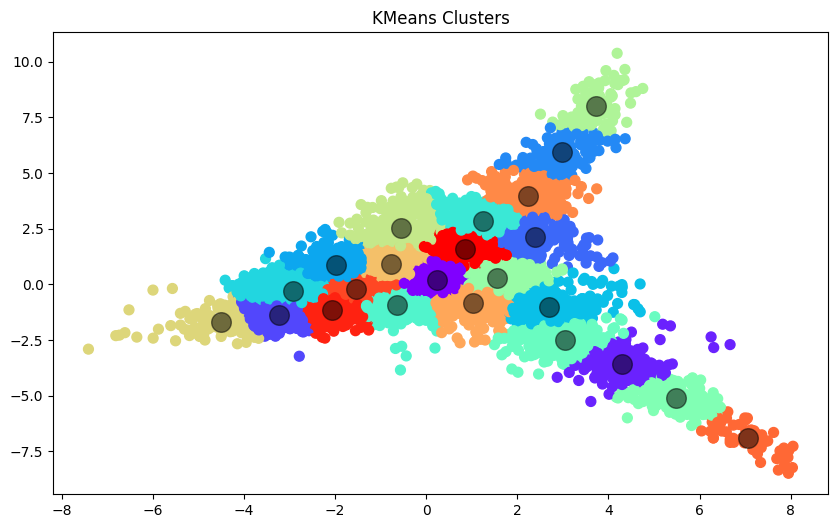

In [238]:
# storing the values of cluster labels
labels=kmeans.predict(x_pca)
# plotting the clusters
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('KMeans Clusters')
plt.show()

#### Wordcloud for each Cluster

Wordcloud for cluster: 0


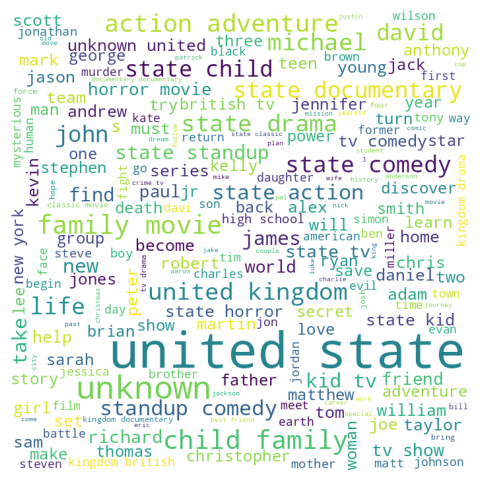

*****************************************************************
Wordcloud for cluster: 1


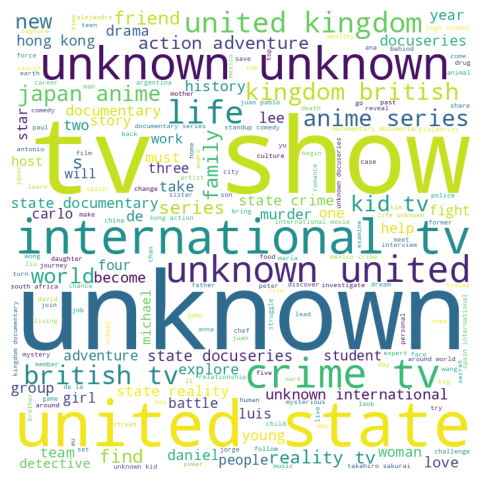

*****************************************************************
Wordcloud for cluster: 2


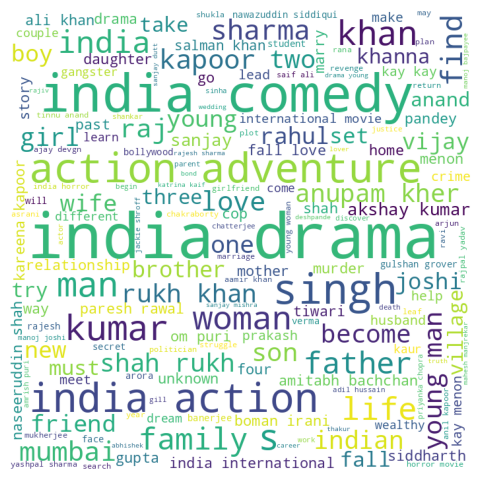

*****************************************************************
Wordcloud for cluster: 3


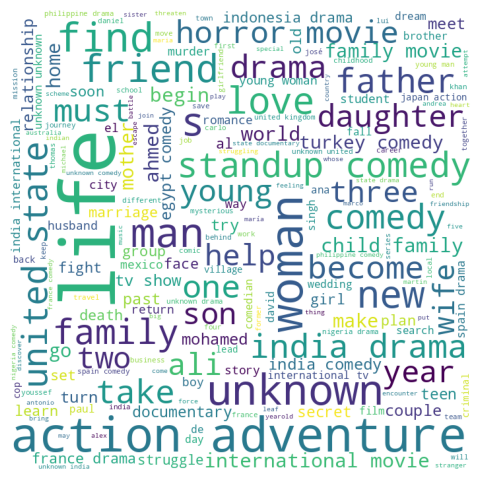

*****************************************************************
Wordcloud for cluster: 4


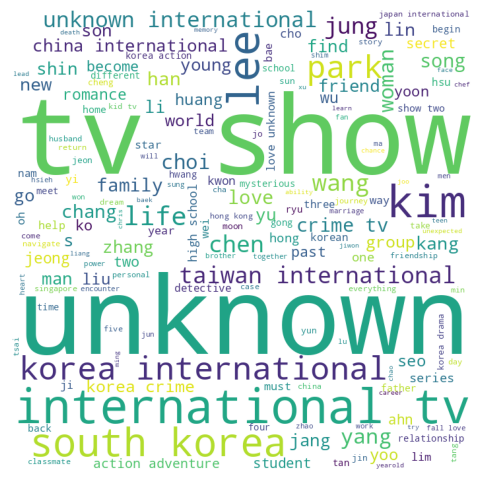

*****************************************************************


In [166]:
# printing wordclouds for each cluster
clustering_df1['kmeans_cluster']=kmeans.labels_
for cn in range(kmeans.n_clusters):
  print('Wordcloud for cluster:',cn)
  wordcloud(clustering_df1[clustering_df1['kmeans_cluster']==cn],'clustering_column')
  print('*'*63)

#### Naming the Clusters

In [239]:
# storing the cluster labels in new column
dataset['kmeans_cluster']=kmeans.labels_
# viewing the clusters' value counts
px.pie(values=dataset['kmeans_cluster'].value_counts().values,names=dataset['kmeans_cluster'].value_counts().index)

In [240]:
# viewing the genre and country for each cluster
for cn in range(kmeans.n_clusters):
  print('',cn)
  print(dataset[dataset['kmeans_cluster']==cn][['country','listed_in']][:20])
  print('*'*37)

 0
                  country                 listed_in
13               Thailand             Documentaries
30                 Canada             Documentaries
39                  Spain                  Comedies
40                 Turkey                  Comedies
42                 Turkey                  Comedies
43                Nigeria                    Dramas
66          United States             Documentaries
67                unknown                    Movies
109                 Kenya      International Movies
146                Mexico             Documentaries
182         United States             Documentaries
219                 Spain                  Comedies
223         United States             Documentaries
236                Israel                    Dramas
244                 India  Children & Family Movies
249           Philippines      International Movies
281         United States             Documentaries
314             Hong Kong        Action & Adventure
318  Unit

### ML Model - 2. Hierarchical Clustering

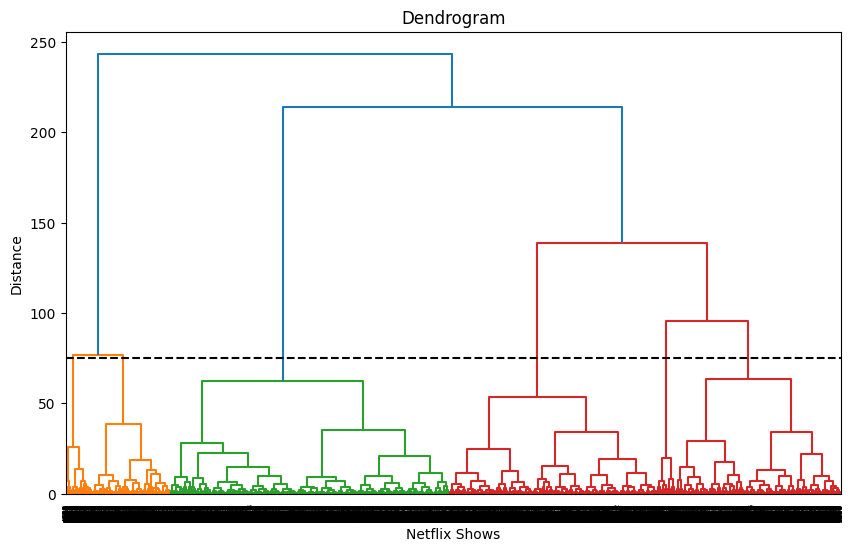

In [228]:
# plotting the dendrogram
dendrogram = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 75, color='black', linestyle='--')
plt.show()

#### **Agglomerative Hierarchical Clustering**

In [229]:
# 
hc=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
hc_labels=hc.fit_predict(x_pca)

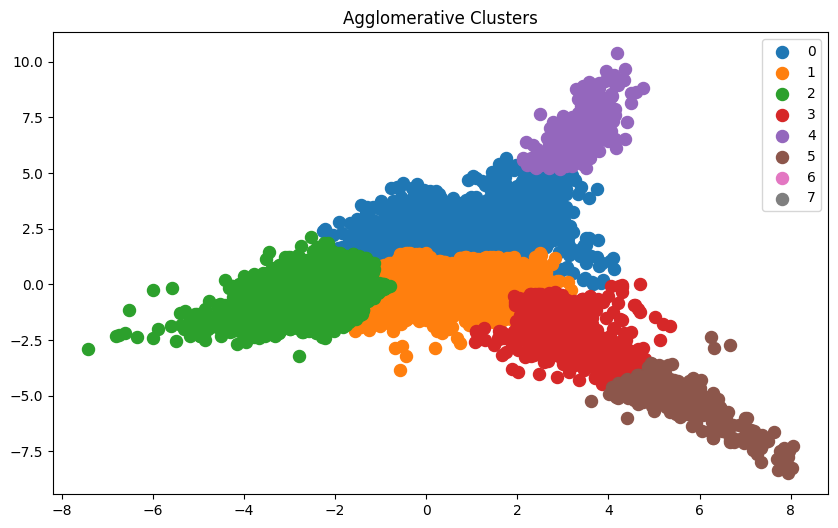

In [230]:
# plotting the agglomerative clusters
for i in range(8):
  plt.scatter(x_pca[hc_labels==i,0],x_pca[hc_labels==i,1],s=75,label=str(i))
plt.title('Agglomerative Clusters')
plt.legend()  
plt.show()  

In [232]:
# storing the cluster labels in new column
dataset['hierarchical_cluster']=hc.labels_
# viewing the clusters' value counts
dataset['hierarchical_cluster'].value_counts()

2    2801
1    2085
0    1650
3     782
5     271
4     188
Name: hierarchical_cluster, dtype: int64

In [242]:
# viewing the genre and country for each cluster
for cn in range(hc.n_clusters_):
  print('',cn)
  print(dataset[dataset['hierarchical_cluster']==cn][['country','listed_in']][:20])
  print('*'*37)

 0
            country               listed_in
0            Brazil  International TV Shows
5            Turkey  International TV Shows
11           Poland          Crime TV Shows
12           Mexico          Crime TV Shows
16          unknown  International TV Shows
26    United States              Reality TV
27      South Korea           Horror Movies
38          unknown  International TV Shows
45           Turkey          Crime TV Shows
52            Spain           Documentaries
58   United Kingdom        British TV Shows
68        Hong Kong      Action & Adventure
80           Turkey          Crime TV Shows
81      South Korea    International Movies
85   United Kingdom        British TV Shows
86            India  International TV Shows
87           Canada          Crime TV Shows
112           Spain  International TV Shows
130   United States              Reality TV
132           India                TV Shows
*************************************
 1
          country      listed_in

##Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***